In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
pip install catboost


# Library

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "colab"
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler,StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import os
sns.set(color_codes=True)

# Load Data

In [8]:
BASE_DIR = '/content/drive/MyDrive/Colab Notebooks/house-prices-advanced-regression-techniques'
TRAIN_PATH = os.path.join(BASE_DIR, 'train.csv')
TEST_PATH = os.path.join(BASE_DIR, 'test.csv')
df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [9]:
df_train.drop('Id',axis= 1,inplace =True)

# EDA

In [10]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
cat_col = df_train.select_dtypes(include = 'object').columns
num_col = df_train.select_dtypes(include =['int64','float64']).columns

print(f"Categorical columns: {df_train[cat_col].shape[1]}")
print(f"Categorical columns: {df_train[num_col].shape[1]}")

Categorical columns: 43
Categorical columns: 37


In [13]:
print("Categoric :",cat_col)
print("Numeric :",num_col)

Categoric : Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Numeric : Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       

In [14]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [15]:
df_train[num_col].skew()

,0
MSSubClass,1.407657
LotFrontage,2.163569
LotArea,12.207688
OverallQual,0.216944
OverallCond,0.693067
YearBuilt,-0.613461
YearRemodAdd,-0.503562
MasVnrArea,2.669084
BsmtFinSF1,1.685503
BsmtFinSF2,4.255261


In [16]:
print("Number of duplicate rows in the dataset:", df_train.duplicated().sum())

Number of duplicate rows in the dataset: 0


##Check Missing Value

In [17]:
missing_value = df_train.isnull().sum()

# Step 2: Filter only columns with missing values and sort
missing_value = missing_value[missing_value > 0].sort_values(ascending=False)

# Step 3: Create a DataFrame with counts and percentages
missing_cat_df = pd.DataFrame({
    'Column_Name': missing_value.index,
    'Missing_Count': missing_value.values,
    'Missing_Percentage': (missing_value.values / len(df_train)) * 100
})

# Step 4: Display summary
print(f"Number columns with missing values: {len(missing_cat_df)}\n")
print("Categorical Columns with Missing Values (Count and Percentage):\n")

# Step 5: Style the DataFrame
missing_cat_df.style.background_gradient(subset=['Missing_Count', 'Missing_Percentage'], cmap='Reds')

Number columns with missing values: 19

Categorical Columns with Missing Values (Count and Percentage):



,Column_Name,Missing_Count,Missing_Percentage
0,PoolQC,1453,99.520548
1,MiscFeature,1406,96.301370
2,Alley,1369,93.767123
3,Fence,1179,80.753425
4,MasVnrType,872,59.726027
5,FireplaceQu,690,47.260274
6,LotFrontage,259,17.739726
7,GarageType,81,5.547945
8,GarageYrBlt,81,5.547945
9,GarageFinish,81,5.547945


## Correlation

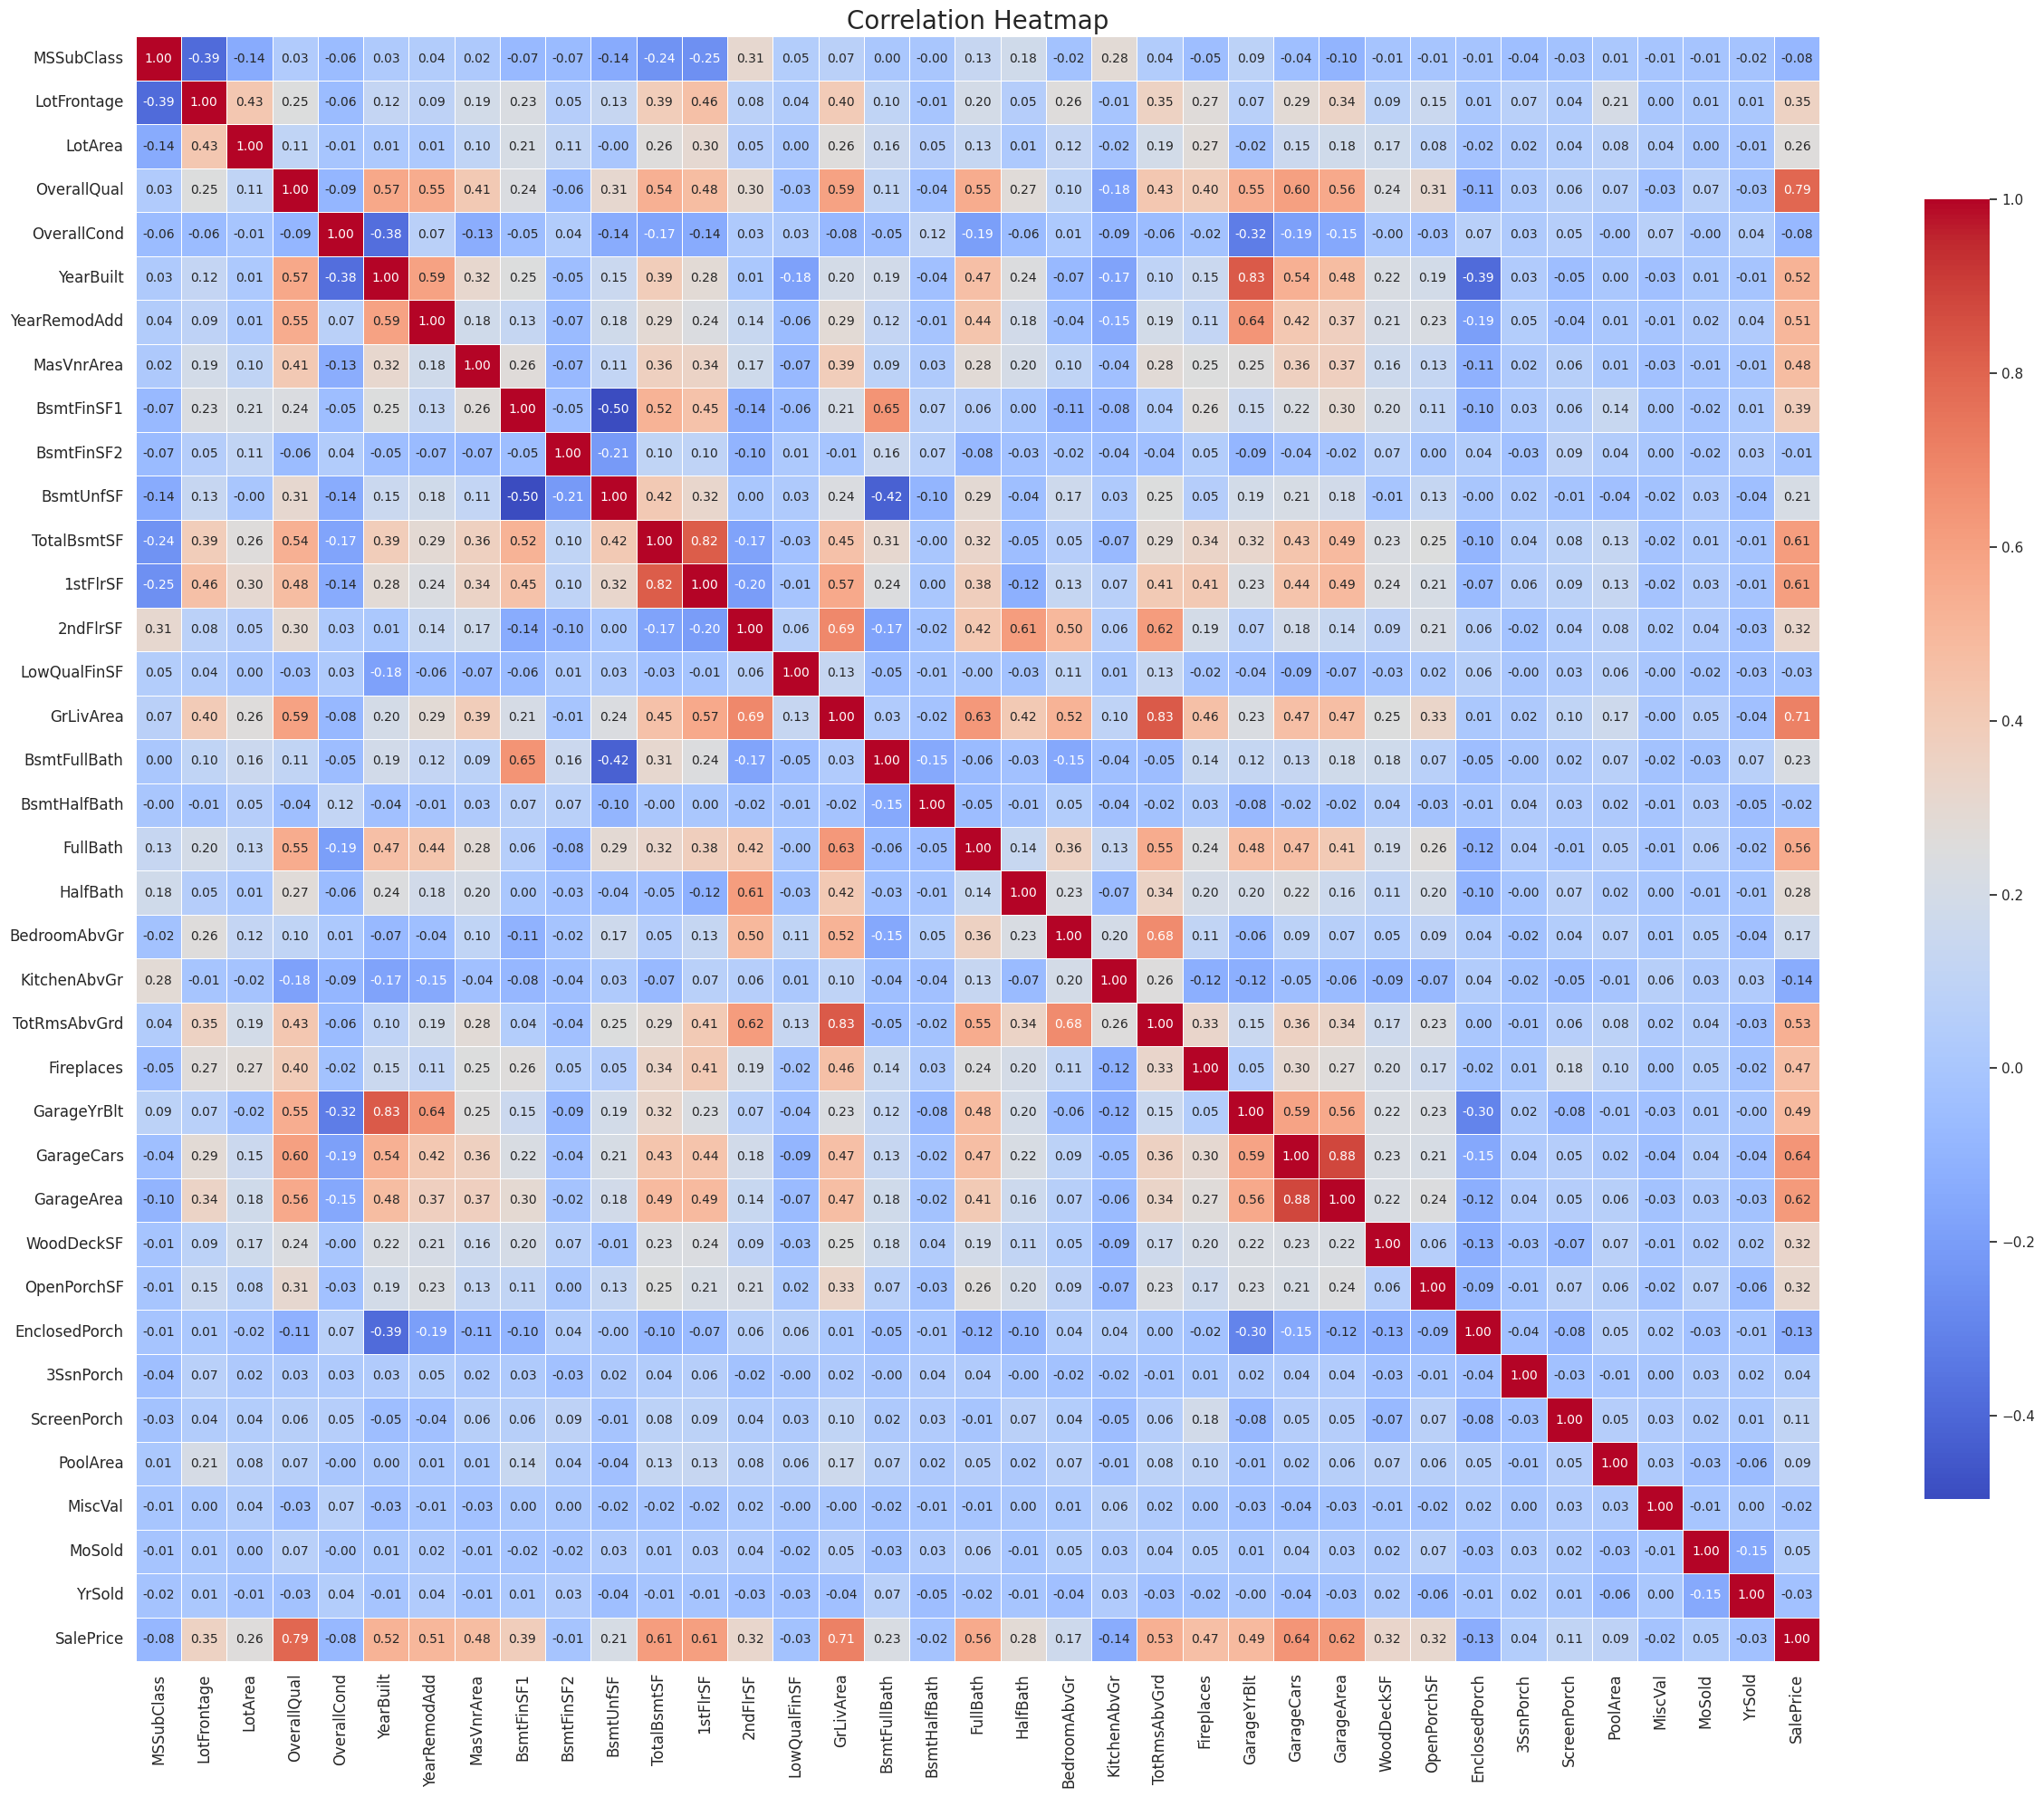

In [18]:
corr = df_train.corr(numeric_only= True)


# Set a large figure size for clarity
plt.figure(figsize=(25, 20))  # Adjust size as needed

# Create heatmap with larger font sizes
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    annot_kws={"size": 10},  # font size inside the heatmap
    cbar_kws={"shrink": 0.8}  # adjust color bar size
)

# Set title and increase tick font size
plt.title("Correlation Heatmap", fontsize=20)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Show the heatmap
plt.tight_layout()
plt.show()


In [19]:
corr = df_train.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

# Select top 10 features excluding SalePrice itself
top_corr = corr[1:16]  # Excludes 'SalePrice' which is at index 0

# Convert to DataFrame for Plotly
top_corr_df = top_corr.reset_index()
top_corr_df.columns = ['Feature', 'Correlation']

# Plot with Plotly
fig = px.bar(
    top_corr_df,
    x='Correlation',
    y='Feature',
    orientation='h',

    title='Top 10 Features Correlated with SalePrice',
    color='Correlation',
    color_continuous_scale='viridis',
    range_x=[0, 1]
)

fig.update_layout(yaxis={'categoryorder':'total ascending'}, width=700, height=450)
fig.show()

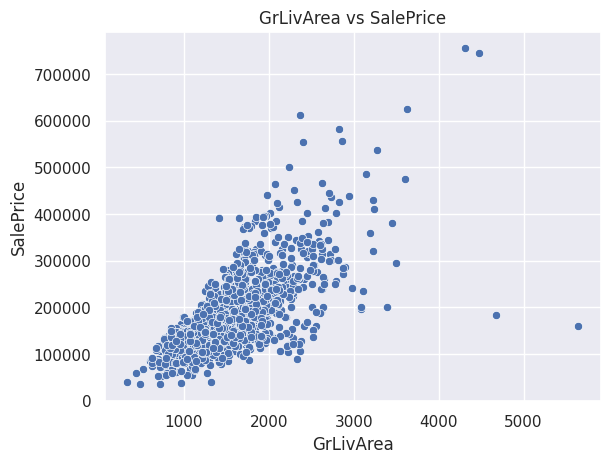

In [20]:
sns.scatterplot(data=df_train, x='GrLivArea', y='SalePrice')
plt.title('GrLivArea vs SalePrice')
plt.show()

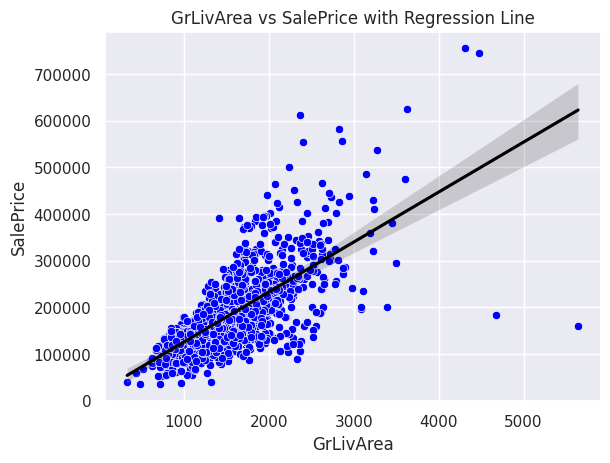

In [21]:
# Scatter plot
sns.scatterplot(data=df_train, x='GrLivArea', y='SalePrice', color='blue')

# Regression line only
sns.regplot(data=df_train, x='GrLivArea', y='SalePrice', scatter=False, color='black')

plt.title('GrLivArea vs SalePrice with Regression Line')
plt.show()

In [22]:
fig = px.scatter(df_train, x='GrLivArea', y='SalePrice', color='OverallQual')
fig.show()

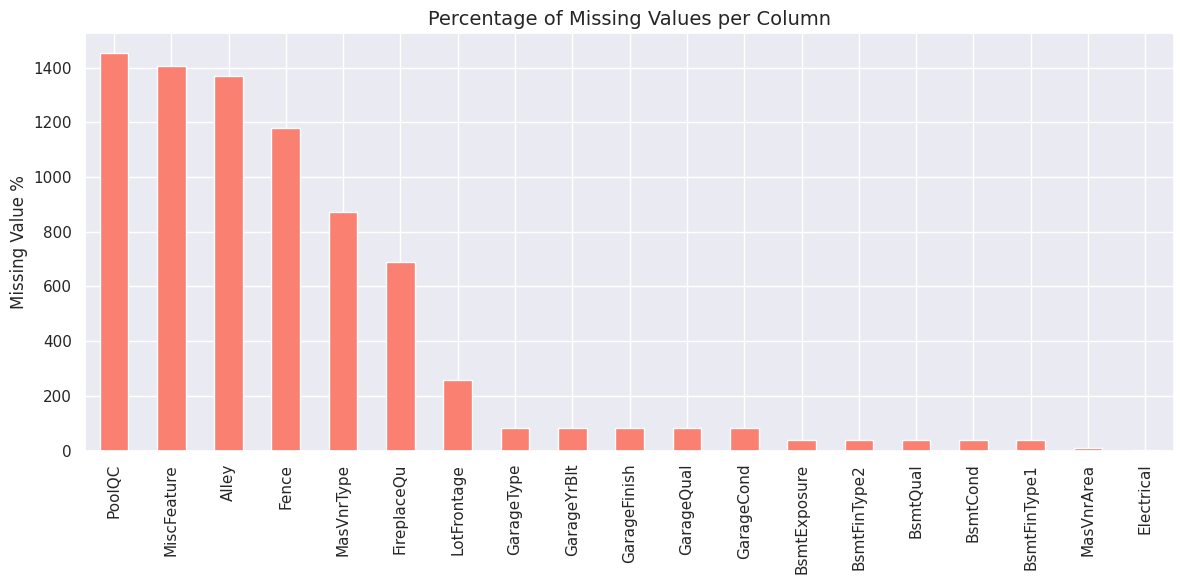

In [23]:
plt.figure(figsize=(12, 6))
missing_value.plot(kind='bar', color='salmon')
plt.title('Percentage of Missing Values per Column', fontsize=14)
plt.ylabel('Missing Value %')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [24]:
def create_features(df):
    # Общая площадь дома
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    # Общая площадь ванных комнат
    df['TotalBath'] = df['FullBath'] + 0.5*df['HalfBath'] + df['BsmtFullBath'] + 0.5*df['BsmtHalfBath']

    # Общее количество комнат
    df['TotalRooms'] = df['TotRmsAbvGrd'] + df['BedroomAbvGr'] + df['KitchenAbvGr']

    # Возраст дома на момент продажи
    df['HouseAge'] = df['YrSold'] - df['YearBuilt']

    # Время с последнего ремонта
    df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
    df['TotalRoomsPerArea'] = df['TotalRooms'] / df['GrLivArea']
    # Площадь крыльца
    df['TotalPorch'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
    df['IsRemodeled'] = (df['YearBuilt'] != df['YearRemodAdd']).astype(int)
    # Дополнительные фичи
    df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    df['Has2ndFloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    df['HasBsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

    # Взаимодействия признаков
    df['OverallQual_TotalSF'] = df['OverallQual'] * df['TotalSF']
    df['OverallQual_GrLivArea'] = df['OverallQual'] * df['GrLivArea']

    return df

train = create_features(df_train)
test = create_features(df_test)

In [25]:
df_train.drop(df_train[df_train['YearRemodAdd'] > df_train['YrSold']].index,axis = 0,inplace= True)

# Split Data

In [26]:
X = df_train
y = df_train.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xt = X_train.shape
xy = X_test.shape
print("train :",xt)
print("test :",xy)

train : (1021, 95)
test : (438, 95)


# Preprocessing

In [27]:
numeric_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())
])

categoric_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("encode", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False))
])
ordinal_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("encode", OrdinalEncoder())
    ])
preprocessor = ColumnTransformer([
    ("numeric", numeric_pipeline, ['MSSubClass', 'LotFrontage', 'LotArea',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold','TotalSF','TotalBath','TotalRooms','HouseAge','RemodAge','TotalPorch',
       'OverallQual_TotalSF','OverallQual_GrLivArea','TotalRoomsPerArea']),
    ("categoric", categoric_pipeline, ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation','Heating', 'CentralAir', 'Electrical',
       'Functional', 'GarageType','PavedDrive','SaleType','SaleCondition','HasPool','Has2ndFloor','HasGarage','HasBsmt','HasFireplace','IsRemodeled']),
    ("ordina", ordinal_pipeline, ['OverallCond','OverallQual','ExterQual','ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
       'GarageFinish', 'GarageQual','GarageCond']),
])

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, Lasso,PoissonRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.compose import TransformedTargetRegressor

# Model

## Linear Regresion LinearRegression

In [29]:
model = Pipeline([
    ("prep", preprocessor),
    ("algo", TransformedTargetRegressor(LinearRegression(fit_intercept=True), func=np.log1p, inverse_func=np.expm1)),
])
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
r2 = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# Tampilkan hasil
print(f"R2: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


R2: 0.9082
MSE: 498828182.10
RMSE: 22334.46


## Ridge

In [30]:
model_ridge = Pipeline([
    ("prep", preprocessor),
    ("algo", TransformedTargetRegressor(Ridge(alpha = 19.0), func=np.log1p, inverse_func=np.expm1)),
])
model_ridge.fit(X_train, y_train)

# Prediksi
y_pred = model_ridge.predict(X_test)

# Evaluasi
r2 = model_ridge.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(np.log(y_test),np.log(y_pred)))
# Tampilkan hasil
print(f"R2: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.5f}")

R2: 0.9244
MSE: 410548920.47
RMSE: 0.12033


## PoissonRegressor

In [31]:
model_poisson = Pipeline([
    ("prep", preprocessor),
    ("algo", TransformedTargetRegressor(PoissonRegressor(alpha=0.006, fit_intercept=True,max_iter=702,),func=np.log1p, inverse_func=np.expm1)),
])
model_poisson.fit(X_train, y_train)

# Prediksi
y_pred = model_poisson.predict(X_test)

# Evaluasi
r2 = model_poisson.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(np.log(y_test),np.log(y_pred)))
# Tampilkan hasil
print(f"R2: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.5f}")


R2: 0.9152
MSE: 460664910.86
RMSE: 0.12285


## XGB

In [32]:
model_xgb = Pipeline([
    ("prep", preprocessor),
    ("algo_xgb", TransformedTargetRegressor(XGBRegressor(random_state=42,subsample= 0.6, n_estimators= 560, max_depth= 3, learning_rate= 0.049, colsample_bytree= 0.6,colsample_bylevel = 0.49,
                                        reg_alpha=1.0,min_split_loss=0.002,reg_lambda = 1.0), func=np.log1p, inverse_func=np.expm1)),
])
model_xgb.fit(X_train, y_train)

# Prediksi
y_pred = model_xgb.predict(X_test)

# Evaluasi
r2 = model_xgb.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(np.log(y_test),np.log(y_pred)))
# Tampilkan hasil
print(f"R2: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.5f}")


R2: 0.9403
MSE: 324362624.00
RMSE: 0.11875


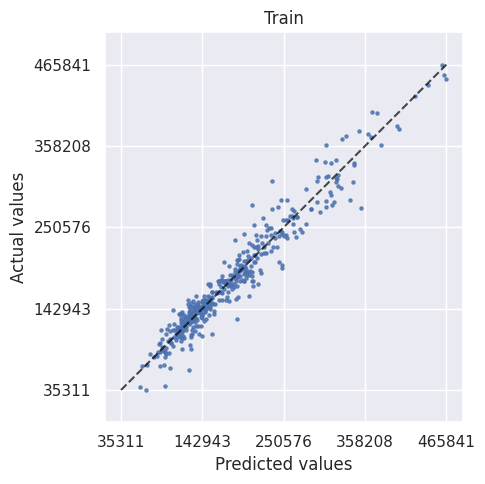

In [33]:
from sklearn.metrics import PredictionErrorDisplay

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
PredictionErrorDisplay.from_estimator(model_xgb, X_test, y_test, kind="actual_vs_predicted", scatter_kwargs={"c": "b", "s": 5}, ax=ax)
ax.set_title("Train")
ax.set_aspect("equal")

fig.tight_layout()

## RF Regressor

In [34]:
model_rf = Pipeline([
    ("prep", preprocessor),
    ("algo_rf", TransformedTargetRegressor(RandomForestRegressor(random_state=42, n_estimators= 450,
                                                                 max_depth= 12,max_features='sqrt'),
                                          func=np.log1p, inverse_func=np.expm1)),
])
model_rf.fit(X_train, y_train)

# Prediksi
y_pred = model_rf.predict(X_test)

# Evaluasi
r2 = model_rf.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# Tampilkan hasil
print(f"R2: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

R2: 0.9141
MSE: 466540861.53
RMSE: 21599.56


## KKN

In [35]:
model_knn = Pipeline([
    ("prep", preprocessor),
    ("algo", TransformedTargetRegressor(KNeighborsRegressor(n_neighbors = 2,weights ='distance',
                                                            p = 1),
                                         func=np.log1p, inverse_func=np.expm1)),
])
model_knn.fit(X_train, y_train)

# Prediksi
y_pred = model_knn.predict(X_test)

# Evaluasi
r2 = model_knn.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(np.log(y_test),np.log(y_pred)))
# Tampilkan hasil
print(f"R2: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.5f}")

R2: 0.8720
MSE: 695577028.77
RMSE: 0.16767


## LGBM

In [36]:
model_lgbm = Pipeline([
    ("prep", preprocessor),
    ("algo", TransformedTargetRegressor(LGBMRegressor(random_state=42, verbose=-1,subsample= 0.8, num_leaves= 5,
                                                      n_estimators= 498, min_child_samples= 10, max_depth= 5,
                                                      learning_rate= 0.06, colsample_bytree= 0.3,
                                                      feature_fraction=0.5,max_bin=100),
                                        func=np.log1p, inverse_func=np.expm1)),
])
model_lgbm.fit(X_train, y_train)

# Prediksi
y_pred = model_lgbm.predict(X_test)

# Evaluasi
r2 = model_lgbm.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(np.log(y_test),np.log(y_pred)))
# Tampilkan hasil
print(f"R2: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.5f}")

R2: 0.9393
MSE: 329871137.98
RMSE: 0.11731


## DecisionTreeRegressor

In [37]:
model_DecisionTree = Pipeline([
    ("prep", preprocessor),
    ("algo", TransformedTargetRegressor(DecisionTreeRegressor(criterion='squared_error', splitter='best', min_samples_split=3,
                                                              max_features=None, random_state=42,
                                                              max_leaf_nodes=None, min_impurity_decrease=0.0, monotonic_cst=None),func=np.log1p, inverse_func=np.expm1)),
])
model_DecisionTree.fit(X_train, y_train)

# Prediksi
y_pred = model_DecisionTree.predict(X_test)

# Evaluasi
r2 = model_DecisionTree.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# Tampilkan hasil
print(f"R2: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


R2: 0.8157
MSE: 1001502625.60
RMSE: 31646.53


## GBR

In [38]:
model_gbr = Pipeline([
    ("prep", preprocessor),
    ("algo", TransformedTargetRegressor(GradientBoostingRegressor(random_state=42,learning_rate=0.05, n_estimators=709,subsample=0.9,max_features= 0.3,init ='zero'),func=np.log1p, inverse_func=np.expm1)),
])
model_gbr.fit(X_train, y_train)

# Prediksi
y_pred = model_gbr.predict(X_test)

# Evaluasi
r2 = model_gbr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(np.log(y_test),np.log(y_pred)))
# Tampilkan hasil
print(f"R2: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.5f}")

R2: 0.9349
MSE: 353528210.36
RMSE: 0.11875


## SVR

In [39]:
model_svr = Pipeline([
    ("prep", preprocessor),
    ("algo", TransformedTargetRegressor(SVR(max_iter=699,epsilon=0.007, C = 0.6), func=np.log1p, inverse_func=np.expm1)),
])
model_svr.fit(X_train, y_train)

# Prediksi
y_pred = model_svr.predict(X_test)

# Evaluasi
r2 = model_svr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(np.log(y_test),np.log(y_pred)))
# Tampilkan hasil
print(f"R2: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.5f}")

R2: 0.9458
MSE: 294346892.76
RMSE: 0.11286


## MLPRegressor

In [40]:
model = Pipeline([
    ("prep", preprocessor),
    ("algo", TransformedTargetRegressor(MLPRegressor(random_state=42, max_iter=100,activation='relu'), func=np.log1p, inverse_func=np.expm1)),
])
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
r2 = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# Tampilkan hasil
print(f"R2: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

R2: -6.1207
MSE: 38692540848.98
RMSE: 196704.20


## CatBoost

In [41]:
model = Pipeline([
    ("prep", preprocessor),
    ("algo", TransformedTargetRegressor(
        regressor=CatBoostRegressor(
            iterations=890,
            depth=5,
            learning_rate=0.09,
            loss_function='RMSE',
            verbose=0,
            random_state=42
        ),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# Fit model
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
r2 = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(np.log(y_test),np.log(y_pred)))

# Tampilkan hasil
print(f"R2: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.5f}")


R2: 0.9426
MSE: 312169699.97
RMSE: 0.11669


# Stacking

In [42]:
from sklearn.ensemble import StackingRegressor
# Base Model
xgb_base    = XGBRegressor(random_state=42,subsample= 0.6, n_estimators= 560, max_depth= 3, learning_rate= 0.049, colsample_bytree= 0.6,
                           colsample_bylevel = 0.49,reg_alpha=1.0,min_split_loss=0.002,reg_lambda = 1.0)

rf_base     = RandomForestRegressor(random_state=42, n_estimators=450, max_depth=13, max_features='sqrt')

lr_base     = LinearRegression(fit_intercept=True)

svr_base    = SVR(max_iter=700,epsilon=0.01, C = 0.6)

knn_base    = KNeighborsRegressor(n_neighbors = 3,weights ='distance',p = 1)

lgbm_base   = LGBMRegressor(random_state=42, verbose=-1,subsample= 0.8, num_leaves= 5, n_estimators= 200, min_child_samples= 10,
                            max_depth= 5,learning_rate= 0.06, colsample_bytree= 0.3)

gbr_base    = GradientBoostingRegressor(random_state=42,learning_rate=0.1, n_estimators=610,subsample=0.9,max_features= 0.2,
                                        init ='zero')

cb_base     = regressor=CatBoostRegressor(iterations=890,depth=5, learning_rate=0.09,loss_function='RMSE',random_state=42)

# Stacking model
stacked_model = StackingRegressor(
    estimators=[
        ('xgb', xgb_base),
        ('rf', rf_base),
        ('lr', lr_base),
        ('SVR', svr_base),
        ('knn', knn_base),
        ('lgbm', lgbm_base),
        ('gbr', gbr_base),
        ('cb', cb_base),

    ],
    final_estimator=Ridge(alpha=0.8),
    n_jobs=-1
)

# preprocessing → stacking → log-transform target
stacking = Pipeline([
    ("prep", preprocessor),
    ("stacked", TransformedTargetRegressor(
        regressor=stacked_model,
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# Fit dan prediksi
stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)

# Evaluasi
r2 = stacking.score(X_test, y_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(np.log(y_test),np.log1p(y_pred)))

print(f"R2: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.5f}")


R2: 0.9469
MSE: 288771062.62
RMSE: 0.11038


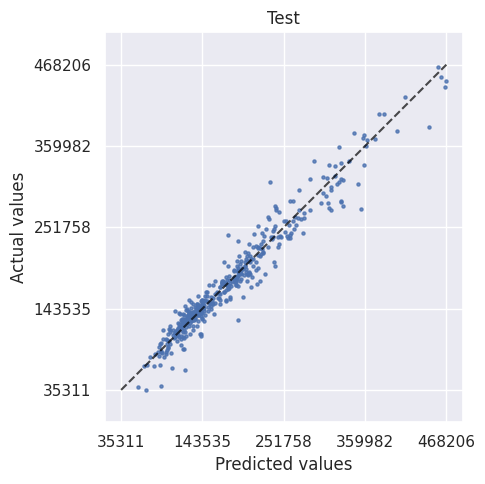

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
PredictionErrorDisplay.from_estimator(stacking, X_test, y_test, kind="actual_vs_predicted", scatter_kwargs={"c": "b", "s": 5}, ax=ax)
ax.set_title("Test")
ax.set_aspect("equal")

fig.tight_layout()

In [44]:
y_submission_pred = stacking.predict(df_test)
# 3. Buat file submission
submission = pd.DataFrame({
    'Id': df_test['Id'],
    'SalePrice': y_submission_pred
})
submission.to_csv('submission1.csv', index=False)


In [45]:
import joblib

joblib.dump(stacking, "final_model.pkl")
print("Model berhasil disimpan ke 'models/final_model.pkl'")

Model berhasil disimpan ke 'models/final_model.pkl'
